In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("ml_ibge_data.csv")
predictions = pd.DataFrame()

# Group the data by CityID
groups = data.groupby('municipality_code')

In [ ]:
for group_name, group_data in groups:
    X = pd.DataFrame({'year': group_data['year']})
    y = group_data['gdp_capita']

    # Initialize and fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict GDP for the next two years
    future_years = pd.DataFrame({'year': [2021, 2022]})
    predicted_gdp_capita = model.predict(future_years)

    # Calculate R-squared value
    r_squared = r2_score(y, model.predict(X))

    # Create a DataFrame for predictions
    city_predictions = pd.DataFrame({
        'municipality_code': [group_name] * 2,
        'year': [2021, 2022],
        'predicted_gdp_capita': predicted_gdp_capita,
        'R-squared': [r_squared] * 2
    })

    # Append the city predictions to the main predictions DataFrame
    predictions = pd.concat([predictions, city_predictions], ignore_index=True)

# Print the predictions with R-squared values
print(predictions)

       municipality_code  year  predicted_gdp_capita  R-squared
0                1100015  2021          25201.421818   0.971612
1                1100015  2022          26575.713636   0.971612
2                1100023  2021          25672.550000   0.935643
3                1100023  2022          26583.370455   0.935643
4                1100031  2021          31235.291636   0.950377
...                  ...   ...                   ...        ...
11135            5222203  2022          21017.982909   0.160871
11136            5222302  2021          40085.984545   0.746084
11137            5222302  2022          41814.045909   0.746084
11138            5300108  2021          94929.231091   0.968585
11139            5300108  2022          98527.644000   0.968585

[11140 rows x 4 columns]


In [ ]:
# Taking a look at the r_squared
average_r_squared = predictions['R-squared'].mean()
print("Average R-squared:", average_r_squared)

Average R-squared: 0.844489171968689


In [ ]:
# Filter the 'predictions' DataFrame for the year 2021 and 2022
predicted_data = predictions[predictions['year'].isin([2021, 2022])]
predicted_data = predicted_data[['year', 'municipality_code', 'predicted_gdp_capita']]

# Filter the 'data' DataFrame for the year 2020
data_2020 = data[data['year'] == 2020]
data_2020 = data_2020[['year', 'municipality_code', 'gdp_capita']]

# Rename the 'predicted_gdp_capita' column to 'gdp_capita' in the predicted data
predicted_data = predicted_data.rename(columns={'predicted_gdp_capita': 'gdp_capita'})

# Concatenate the two DataFrames
combined_data = pd.concat([predicted_data, data_2020], ignore_index=True)

# Drop duplicates based on all columns except 'year'
combined_data = combined_data.drop_duplicates(subset=['municipality_code', 'gdp_capita'], keep='first')
combined_data['gdp_capita'] = combined_data['gdp_capita'].round(2)

# Print the combined DataFrame
print(combined_data)

       year  municipality_code  gdp_capita
0      2021            1100015    25201.42
1      2022            1100015    26575.71
2      2021            1100023    25672.55
3      2022            1100023    26583.37
4      2021            1100031    31235.29
...     ...                ...         ...
16705  2020            5221700    18996.39
16706  2020            5221809    34252.29
16707  2020            5222005    42019.96
16708  2020            5222054    47171.97
16709  2020            5222203    19310.39

[16710 rows x 3 columns]


In [ ]:
# Save the combined data to a CSV file
combined_data.to_csv('final_ibge_data.csv', index=False)

In [ ]:
# As now both DFs come from files, it's better to clear RAM memory and start over with this cell
inep_data = pd.read_csv("final_inep_data.csv")
ibge_data = pd.read_csv("final_ibge_data.csv")

In [ ]:
# Merge both files
merged_df = pd.merge(inep_data, ibge_data, on=['year', 'municipality_code'], how='left')
print(merged_df)

                    id  year  age_code sex_code  civil_code  ethnicity_code  \
0         200006271946  2020        11        F           1               2   
1         200001195856  2020        11        M           2               3   
2         200001943954  2020         4        F           2               3   
3         200001908998  2020         2        M           1               3   
4         200001634757  2020         4        F           1               3   
...                ...   ...       ...      ...         ...             ...   
12649041  210056389903  2022         3        M           1               1   
12649042  210057205644  2022        14        F           2               1   
12649043  210056699189  2022         2        M           1               1   
12649044  210056983033  2022         3        M           1               3   
12649045  210056307777  2022         2        F           2               3   

          nationality_code  conclusion_code  conclu

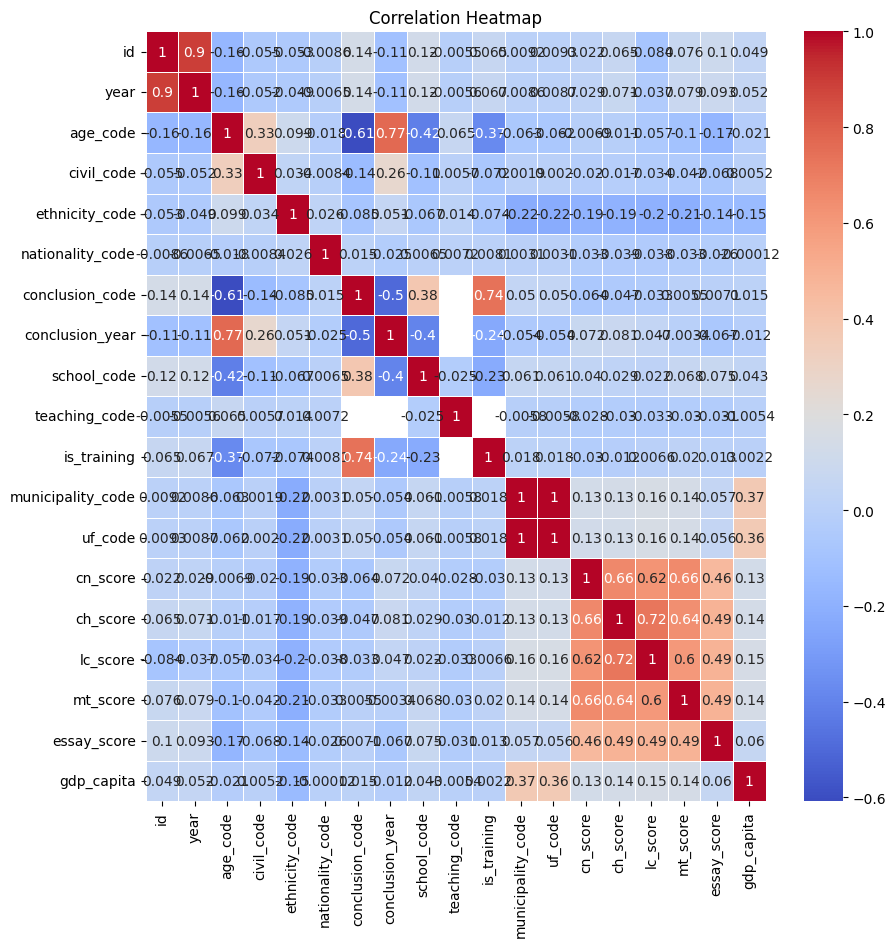

In [ ]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

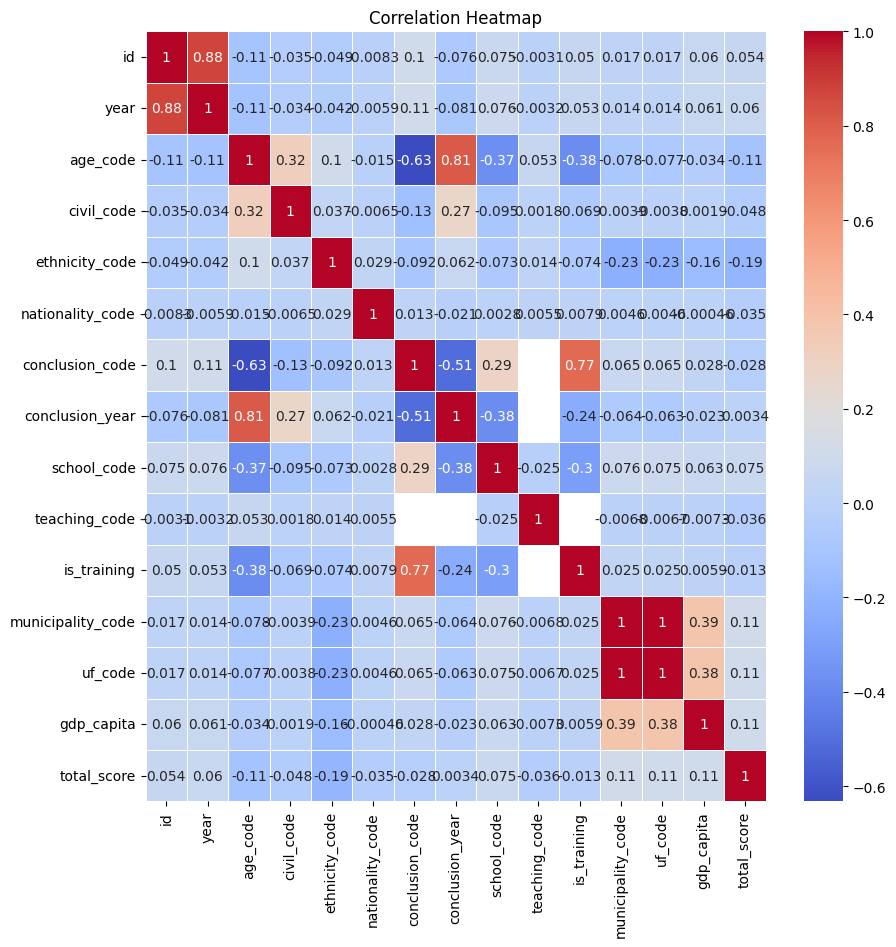

In [ ]:
# Cleaning the dataset again

# Dropping rows where all of the scores are NaN
merged_df = merged_df.dropna(subset=['cn_score', 'ch_score', 'lc_score', 'mt_score', 'essay_score'], how='all')

# Filling NaN on score with zeros
score_columns = ['cn_score', 'ch_score', 'lc_score', 'mt_score', 'essay_score']
merged_df[score_columns] = merged_df[score_columns].fillna(0)

# Creating a unique score column
merged_df['total_score'] = (
    merged_df['cn_score'] +
    merged_df['ch_score'] +
    merged_df['lc_score'] +
    merged_df['mt_score'] +
    merged_df['essay_score']
)

# Dropping the score_columns
merged_df = merged_df.drop(columns=score_columns)

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# Extracting more insights
merged_df.describe()

,id,year,age_code,civil_code,ethnicity_code,nationality_code,conclusion_code,conclusion_year,school_code,teaching_code,is_training,municipality_code,uf_code,gdp_capita,total_score
count,7.653029e+06,7.653029e+06,7.653029e+06,7.653029e+06,7.653029e+06,7.653029e+06,7.653029e+06,7.653029e+06,7.653029e+06,2.698272e+06,7.653029e+06,7.653029e+06,7.653029e+06,7.653029e+06,7.653029e+06
mean,2.064261e+11,2.020966e+03,4.688623e+00,1.040625e+00,2.030607e+00,1.029087e+00,1.692902e+00,2.084514e+00,1.433779e+00,1.005207e+00,1.608426e-01,3.099974e+06,3.085282e+01,3.662828e+04,2.593097e+03
std,4.827276e+09,8.288960e-01,3.639132e+00,3.721656e-01,1.021351e+00,2.103887e-01,7.438974e-01,3.836758e+00,6.242188e-01,7.197170e-02,3.673857e-01,9.942068e+05,9.913489e+00,2.703390e+04,5.436408e+02
min,2.000010e+11,2.020000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100015e+06,1.100000e+01,-4.832762e+04,0.000000e+00
25%,2.000050e+11,2.020000e+03,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.408003e+06,2.400000e+01,2.041714e+04,2.290300e+03
50%,2.100526e+11,2.021000e+03,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.118809e+06,3.100000e+01,2.982395e+04,2.603200e+03
75%,2.100553e+11,2.022000e+03,6.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,3.549904e+06,3.500000e+01,4.815044e+04,2.947300e+03
max,2.100580e+11,2.022000e+03,2.000000e+01,4.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,1.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,5.300108e+06,5.300000e+01,5.911011e+05,4.313400e+03


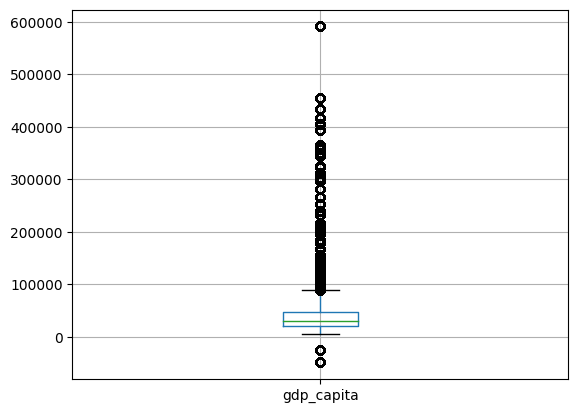

In [ ]:
# Boxplotting gdp_capita to analyze the presence of outliers
merged_df[['gdp_capita']].boxplot()
plt.show()

In [ ]:
# Calculating the Interquartile Range
Q1 = merged_df['gdp_capita'].quantile(0.25)
Q3 = merged_df['gdp_capita'].quantile(0.75)
IQR = Q3 - Q1

# Definining the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers
filtered_df = merged_df[(merged_df['gdp_capita'] >= lower_bound) & (merged_df['gdp_capita'] <= upper_bound)]

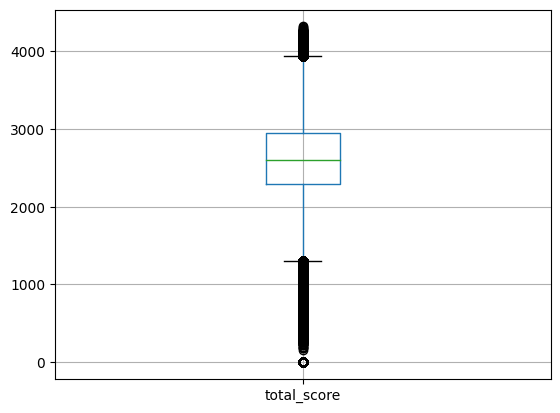

In [ ]:
# Boxplotting total_score to analyze the presence of outliers
filtered_df[['total_score']].boxplot()
plt.show()

In [ ]:
# Calculating the Interquartile Range
Q1 = filtered_df['total_score'].quantile(0.25)
Q3 = filtered_df['total_score'].quantile(0.75)
IQR = Q3 - Q1

# Definining the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers
final_df = filtered_df[(filtered_df['total_score'] >= lower_bound) & (filtered_df['total_score'] <= upper_bound)]

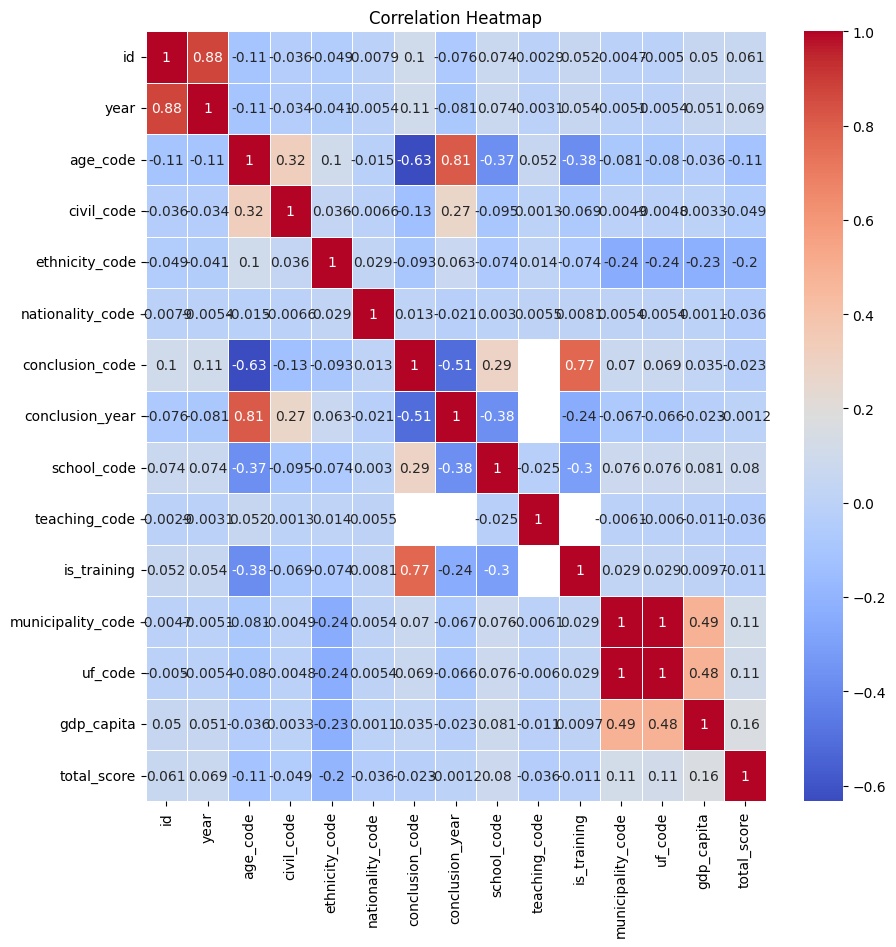

In [ ]:
# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Calculating the correlation between 'gdp_capita' and 'total_score' for each state
# As the result is a 2x2 matrix, there's the need of using iloc[0::2,-1]
correlations = final_df.groupby('uf_name')[['gdp_capita', 'total_score']].corr().iloc[0::2,-1].reset_index()
correlations = correlations[['uf_name', 'total_score']]

# Renaming the columns for clarity
correlations.columns = ['uf_name', 'correlation']

print(correlations)

   uf_name  correlation
0       AC     0.130414
1       AL     0.113991
2       AM     0.205076
3       AP     0.140548
4       BA     0.057379
5       CE     0.132005
6       DF          NaN
7       ES     0.090830
8       GO     0.128179
9       MA     0.160313
10      MG     0.104432
11      MS     0.004210
12      MT     0.063293
13      PA     0.068226
14      PB     0.171203
15      PE     0.119964
16      PI     0.087279
17      PR     0.059280
18      RJ     0.102219
19      RN     0.156628
20      RO     0.047718
21      RR     0.117222
22      RS     0.106203
23      SC     0.038034
24      SE     0.127371
25      SP     0.076926
26      TO     0.109453
